# Homework 1

Welcome to your first homework notebook. Remember - feel free to add more cells as you need!

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# comment this line if you do not want all of your figures 
# to have the same large size
# Note: if this parameter isnt taking effect, run this cell 
# a few more times to have it stick
mpl.rcParams['figure.figsize'] = [10, 7]

# Problem 

This homework problem is almost the shortest to explain, the easiest to skip, but the most important to actually do. 

* Your comments/responses to this problem **should not** be a short 1-2 sentence rephrasing of the abstract. I'm asking for your *thoughtful* comments and reflections. 
* You do **not** have to agree or disagree with anything. Just **reflect** on what the readings are saying, and **contextualize** them with our class discussions, your previous exposure to these topics in class/work/research, your future plans, etc.

## A Few Useful Things about Machine Learning

Read the following (short) paper: [A Few Useful Things to Know about Machine Learning - Pedro Domingos](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf).

If you have read it prior to this class, please read it again. Read it more than once if you have time!

Use what we discussed in class to guide your reading. Use the reading to dissect, clarify and reinforce the topics discussed in class, as well as presented in this paper.

In the cell(s) below, please write down some of you questions/comments/concerns.

**EDIT THIS CELL WITH YOUR QUESTIONS/COMMENTS/CONCERNS. FEEL FREE TO MAKE MORE.**

## 50 Years of Data Science

Read the following (medium) length paper: [50 Years of Data Science - David Donoho](https://www.tandfonline.com/doi/pdf/10.1080/10618600.2017.1384734?needAccess=true)

If you have read it prior to this class, please read it again. Read it more than once if you have time!

If this paper really interested you, or really angered you, (or both!) and you have some extra time, feel free to search for "50 years of data science" in google and enjoy the *many* thoughtful comments and responses it inspired. 

Use what we discussed in class to guide your reading. Use the reading to dissect, clarify and reinforce the topics discussed in class, as well as presented in this paper.

In the cell(s) below, please write down some of you questions/comments/concerns.

**EDIT THIS CELL WITH YOUR QUESTIONS/COMMENTS/CONCERNS. FEEL FREE TO MAKE MORE.**

## Learning from Data

Read chapters 1 and 2 of **Learning From Data**. Use what we discussed in class to guide your reading. Use the reading to dissect, clarify and reinforce the topics discussed in class, as well as presented in this notebook. 

Since we didn't go into too much detail about the how the [Vapnik–Chervonenkis dimension](https://en.wikipedia.org/wiki/VC_dimension) was derived, thats safe to skip (**unless you are interested!**). 

Pay special attention to the Exercises in the text, and  at least spend 1-2 minutes **thinking** about them. 

* Did they clarify anything?
* Do they make you *question* anything we discussed in class? 
* Was one or two particularly confusing?

In the cell(s) below, please write down some of you questions/comments/concerns.

**EDIT THIS CELL WITH YOUR QUESTIONS/COMMENTS/CONCERNS. FEEL FREE TO MAKE MORE.**

# Problem 1

This problem will make us think a little more about *bounds*, and when we can and can't use them.

Run a simulation to flip $1,000$ fair coins. Flip **each** coin independently $10$ times. Let's focus on $3$ coins as follows: 

* $c_1$ is the first coin flipped; 
* $c_{rand}$ is a coin you choose at random; 
* $c_{min}$ is the coin that had the **minimum** frequency of heads (pick the earlier one in case of a tie). 

Let $\nu_1$, $\nu_{rand}$ and $\nu_{min}$ be the fraction of heads you obtain for the respective three coins.

In [58]:
simulation1 = np.array([])

In [59]:
for i in range(1000):
    random_fraction = np.mean(np.random.choice([0, 1], size=10)) # O is not head and 1 is head
    simulation1 = np.append(simulation1, random_fraction)

In [60]:
v_1 = simulation1[0]
v_rand = simulation1[np.random.randint(0,1000)]
v_min = min(simulation1)

In [61]:
print(v_1,v_rand,v_min)

0.3 0.7 0.0


** EDIT THIS CELL, AND THE CELLS ABOVE WITH YOUR ANSWERS. FEEL FREE TO MAKE MORE **

## 1.A

What is $\mu$ for the first coin? What about $\mu$ for the second coin? And the third?

**Answer:** $\mu$ for the first coin should be 0.5, and the same for the second and the third because each of them are i.i.d. So there is no bias in picking up the sample. And a fair coin should have a probability of 50% of heads and 50% of no heads.

## 1.B.

Repeat this entire experiment a **large** number of times (e.g., $100$, $1000$ runs of the entire experiment) to get several instances of $\nu_1,\nu_{rand}$ and $\nu_{min}$ and plot the histograms of the distributions of $\nu_1$, $\nu_{rand}$ and $\nu_{min}$. Notice that which coins end up being $\nu_{rand}$ and $\nu_{min}$ may differ from one run to another.

In [70]:
v_1_array = np.array([])
v_rand_array = np.array([])
v_min_array = np.array([])

for repeat in range(1000):
    simulation = np.array([])
    for i in range(1000):
        random_fraction = np.mean(np.random.choice([0, 1], size=10)) # O is not head and 1 is head
        simulation = np.append(simulation, random_fraction)
    v_1_array = np.append(v_1_array,simulation[0])
    v_rand_array = np.append(v_rand_array,simulation[np.random.randint(0,1000)])
    v_min_array = np.append(v_min_array,min(simulation))

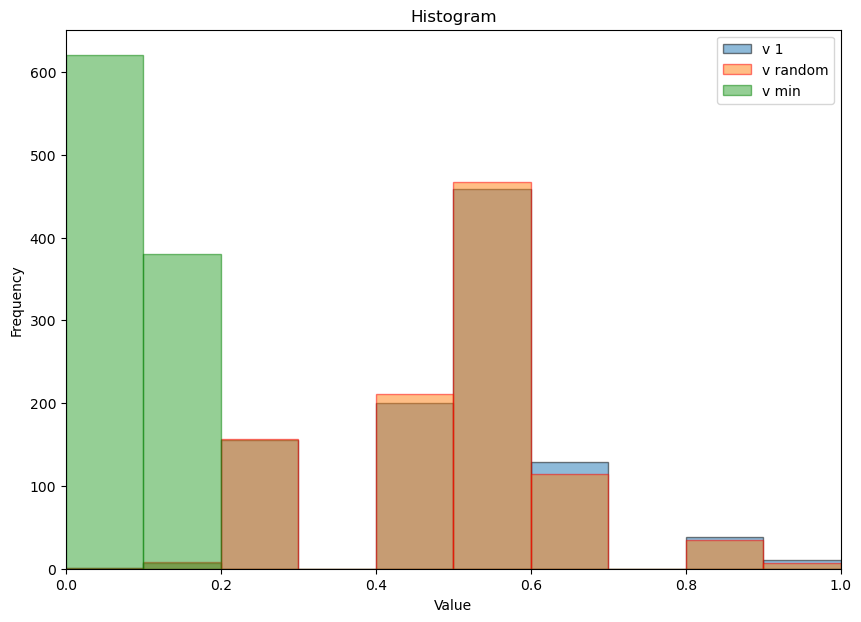

In [75]:
# Define common bin edges
bin_edges = np.linspace(0, 1, 11)  # Creates an array from 0 to 1 with 11 points

# Create the histogram plot with the same bin edges
plt.hist(v_1_array, bins=bin_edges, edgecolor='black', alpha=0.5, label='v 1')
plt.hist(v_rand_array, bins=bin_edges, edgecolor='red', alpha=0.5, label='v random')
plt.hist(v_min_array, bins=bin_edges, edgecolor='green', alpha=0.5, label='v min')

# Add titles and labels
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Set the x-axis range
plt.xlim(0, 1)

# Show the plot
plt.legend()
plt.show()

**Answer:** The distributions of $\nu_1$ and $\nu_{random}$ are almost the same because they are i.i.d, and picked from the entire process without bias. While the distribution of $\nu_{min}$ is totally different from the other two because it is picked up with bias.

## 1.C 

Using (b), plot estimates for $\mathbb{P}[|\mu-\nu| > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2N\epsilon^2}$ (on the same graph).

**Answer:** The estimate of $\mathbb{P}[|\mu-\nu| > \epsilon]$ here is the frequency of $[|0.5-\nu| > \epsilon]$ divided by the total experiments.

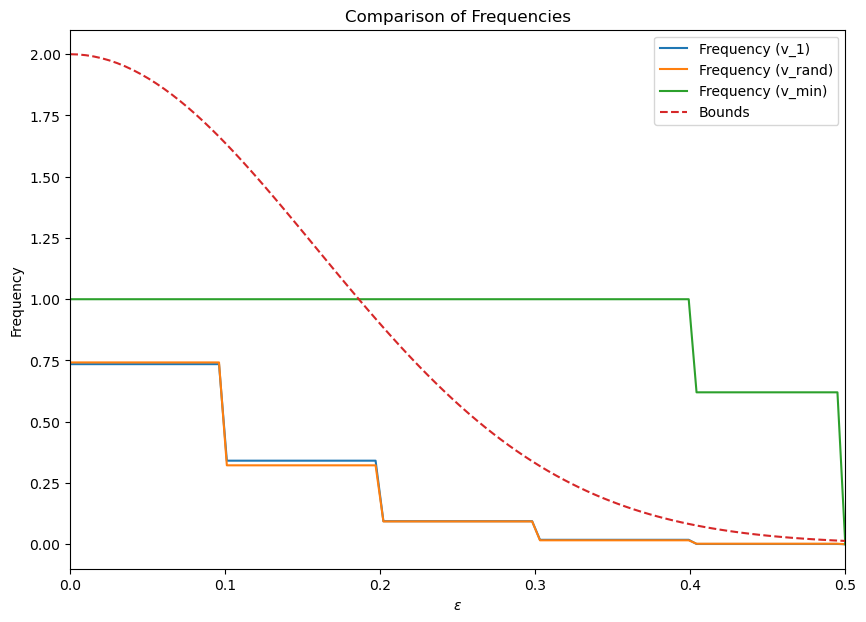

In [82]:
# Define a range of epsilon values
epsilons = np.linspace(0, 0.5, 100)

# Function to calculate frequency
def calculate_frequency(data_array, epsilons):
    frequencies = []
    for epsilon in epsilons:
        condition = np.abs(0.5 - data_array) > epsilon
        frequency = np.sum(condition) / len(data_array)
        frequencies.append(frequency)
    return frequencies

# Calculate frequencies for each array
freq_v_1 = calculate_frequency(v_1_array, epsilons)
freq_v_rand = calculate_frequency(v_rand_array, epsilons)
freq_v_min = calculate_frequency(v_min_array, epsilons)

# Calculate bounds
bounds = 2 * np.exp(-2 * 10 * epsilons ** 2)

# Plot the results
plt.plot(epsilons, freq_v_1, label='Frequency (v_1)')
plt.plot(epsilons, freq_v_rand, label='Frequency (v_rand)')
plt.plot(epsilons, freq_v_min, label='Frequency (v_min)')
plt.plot(epsilons, bounds, label='Bounds', linestyle='--')

# Update title and axis labels
plt.title('Comparison of Frequencies')
plt.xlabel('$\\epsilon$')
plt.ylabel('Frequency')

# Set x-axis range
plt.xlim(0, 0.5)

# Display the legend
plt.legend()

# Show the plot
plt.show()

## 1.D 

Which coins obey the Hoeffding bound, and which ones do not? Eplain why.

**Answer:** The first coin and the randomly picked coin obey the Hoeffding bound because they are i.i.d and going to converge to their true expectation 0.5 when the N, sample size, goes large enough. However, the first coin which has the minimum ratio of heads is picked biasly. So, it doesn't obey the Hoeffding Bound. 

# Problem 2

In lecture, we left open the problem of the behavior of the **test set**: $E_{test}$. Think about it! Using what we did in class, HW0, and above, make some plots, some comments, etc., below. **Think and explore!**

*Hint: The response is not as complicated as you might think!*

**EDIT THIS CELL AND THOSE ABOVE WITH YOUR ANSWER. FEEL FREE TO MAKE MORE.**

# Problem 3

Consider a target function $f(x) = sin(\pi x)$. Lets plot it:

<function matplotlib.pyplot.show(close=None, block=None)>

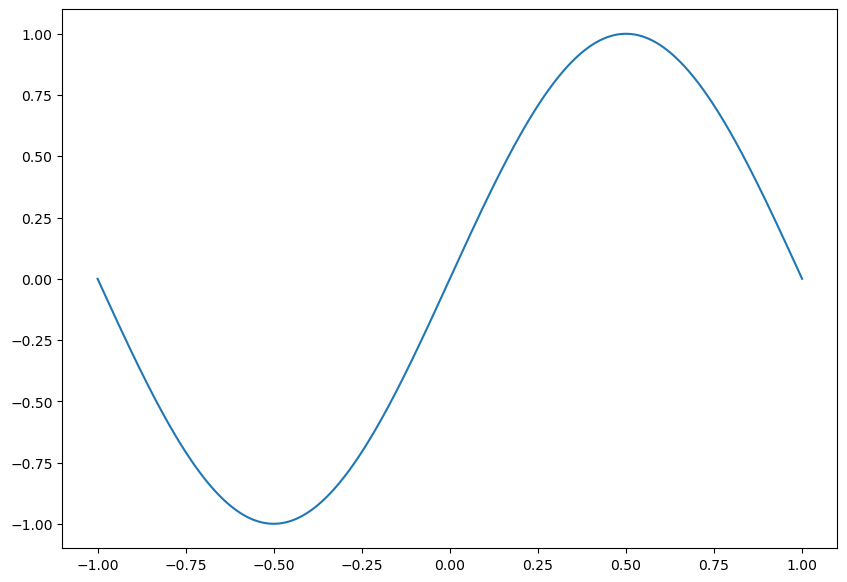

In [12]:
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y)
plt.show

Now, generate a **data set of size $N = 2$** by sampling $x$ uniformly in $[-1, 1]$ to generate a $(x_1, y_1), (x_2,y_2)$. Use your solution to HW0!

In [5]:
# Generate the data set as required
x_random = np.random.uniform(-1,1,2)
y_random = np.sin(np.pi*x_random)
sample_df = pd.DataFrame({
    'x': x_random,
    'y': y_random
})

<function matplotlib.pyplot.show(close=None, block=None)>

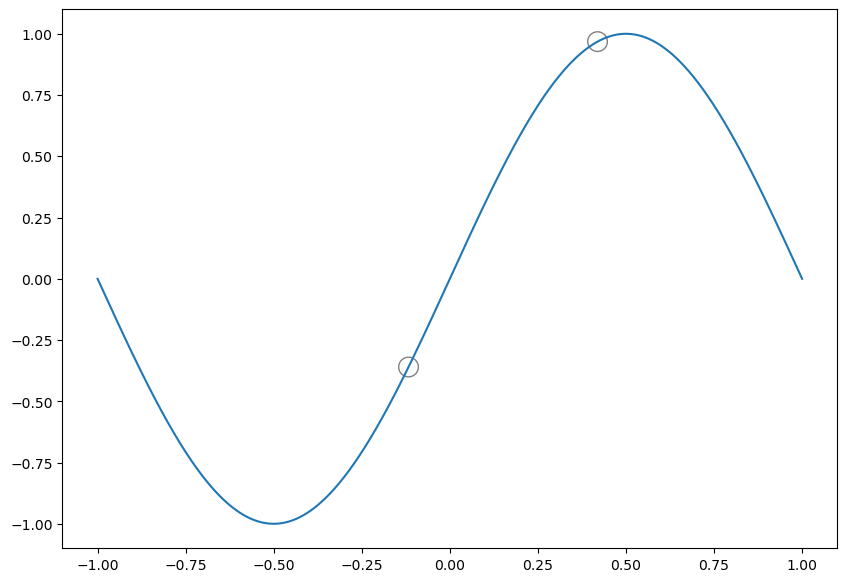

In [15]:
# Plot
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y)

# Add two sample points
plt.scatter(sample_df['x'],sample_df['y'], marker='o', edgecolor= 'gray', facecolor= 'none', s= 200)

plt.show

In the remainder of the problem, we will fit this data using one of two models: 

$$
\begin{align}
\mathcal{H}_0 &: \text{Set of all lines of the form } h(x) = b\\
\mathcal{H}_1 &:  \text{Set of all lines of the form } h(x) = ax + b
\end{align}
$$

and compare their behavior.

## 3.A

Lets begin $\mathcal{H}_0$. This is the **constant** hypothesis that best fits the data. Just from basic reasoning, what do you think it will be? Can you write down a closed form solution?

**Answer:** It should be a horizontal line between the two sample points. And the closed form solution is: $\hat{y} = y_1 + y_2$

Now, try and plot your answer, with the function above

<function matplotlib.pyplot.show(close=None, block=None)>

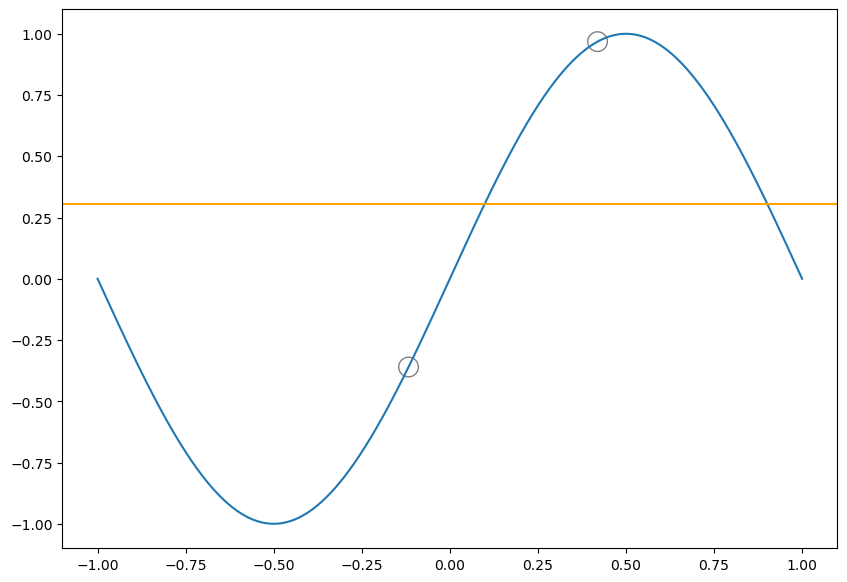

In [18]:
# Plot
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y)

# Add two sample points
plt.scatter(sample_df['x'],sample_df['y'], marker='o', edgecolor= 'gray', facecolor= 'none', s= 200)

# Add the horizontal line
plt.axhline(y = sample_df['y'].mean(), color='orange')

plt.show

To compare your answer, lets have `numpy` do the heavy lifting for us and see what it comes up with. We can actually use `numpy`'s built in `polyfit` function:

In [23]:
np.polyfit?

A great companion to this function, is `numpy`'s `poly1d` function.

In [20]:
np.poly1d?

This function takes in polynomial orders and returns a handy convenient **function** we can now use in python like this: $$myNewFunction(x) = x^3 + 2x^2 -9$$

In [21]:
myNewFunction = np.poly1d([1,2,0,-9])

Now lets plot it:

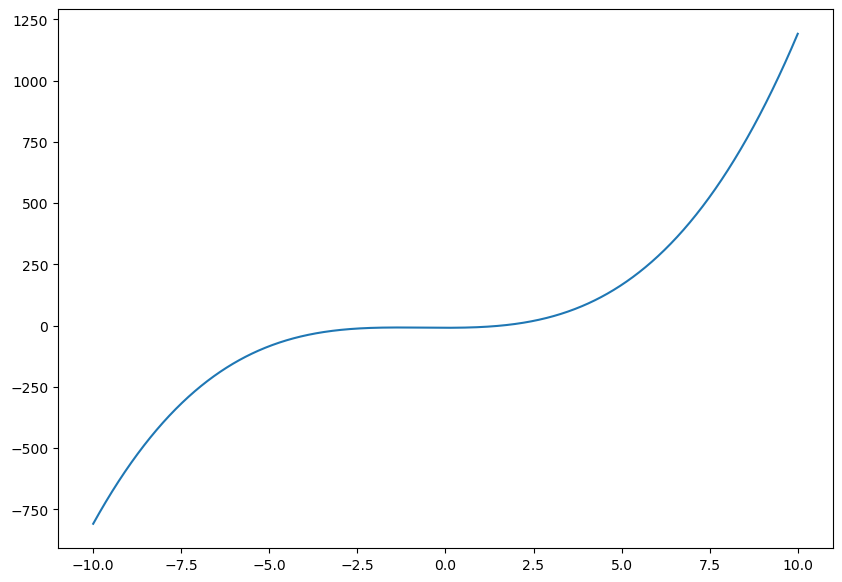

In [22]:
xTemp = np.linspace(-10,10,1000)
plt.plot(xTemp,myNewFunction(xTemp));

Verify this plot matches this on on [Wolfram Alpha](https://www.wolframalpha.com/input/?i=plot+x%5E3%2B2x%5E2-9+from+-10+to+10). 

Ok! Now we know how to use these functions, so lets get to it. Have `numpy` calculate the best $0th$-order (constant) polynomial, and plot it along with your guess:

In [24]:
np.polyfit(sample_df['x'], sample_df['y'],0)

array([0.30387362])

In [29]:
np.poly1d(np.polyfit(sample_df['x'], sample_df['y'],0))

0.303873622382594

<function matplotlib.pyplot.show(close=None, block=None)>

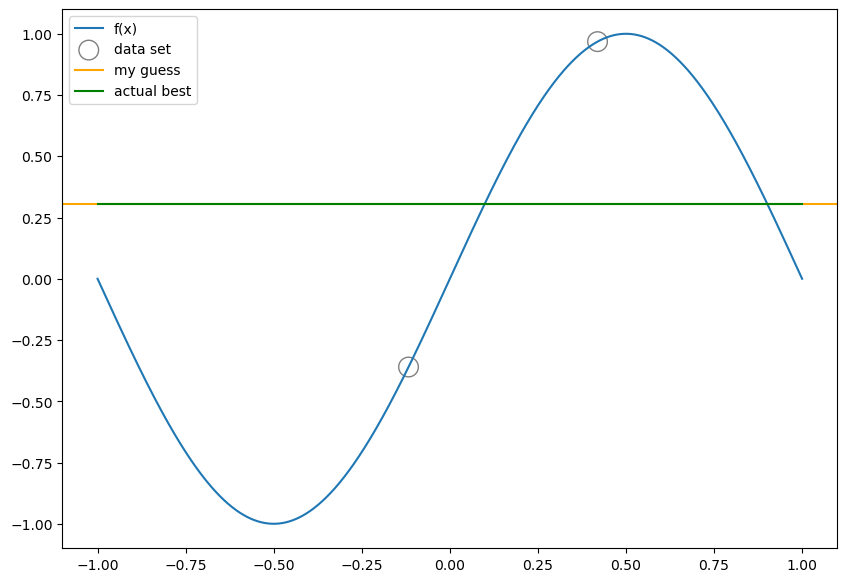

In [33]:
# Plot
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y, label='f(x)')

# Add two sample points
plt.scatter(sample_df['x'],sample_df['y'], marker='o',
            edgecolor= 'gray', facecolor= 'none', s= 200, label='data set')

# Add the horizontal line by guessing
plt.axhline(y = sample_df['y'].mean(), color='orange', label='my guess')

# Add the horizontal line using numpy polyfit
plt.plot(x, np.poly1d(np.poly1d(np.polyfit(sample_df['x'], sample_df['y'],0)))(x),
         color='green', label='actual best')

plt.legend()

plt.show

Your guess and the actual one should be overlapping! 

## 3.B

For $\mathcal{H}_1$, what do you think it would be? Can you write down a closed form answer?

**Answer:** A line passing through these two points:

\begin{equation}
\hat{y} = mx + b
\end{equation}

\begin{equation}
m = \frac{y_2 - y_1}{x_2 - x_1}
\end{equation}

\begin{equation}
b = y_2 - m \times x_2
\end{equation}

<function matplotlib.pyplot.show(close=None, block=None)>

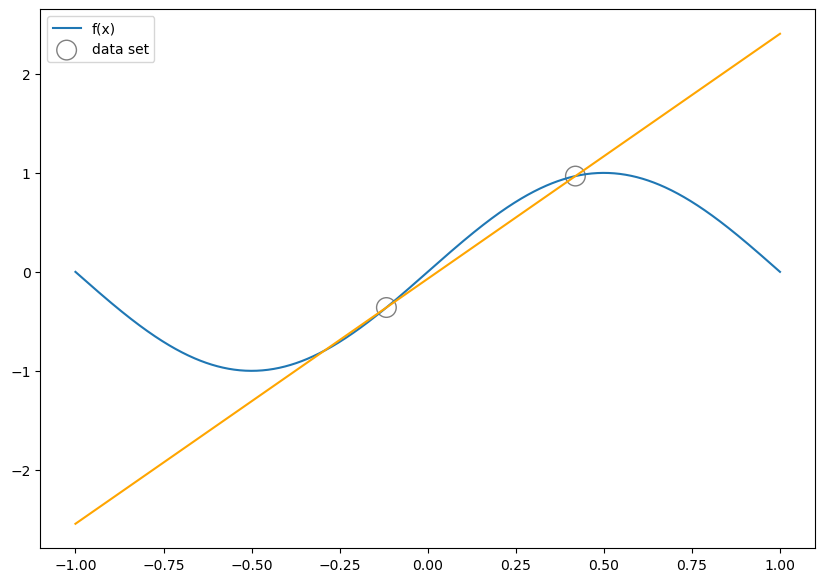

In [35]:
# Plot
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y, label='f(x)')

# Add two sample points
plt.scatter(sample_df['x'],sample_df['y'], marker='o',
            edgecolor= 'gray', facecolor= 'none', s= 200, label='data set')

# Add the line pass these two points

# Find the slope and intercept of the line passing through the two points
m = (sample_df['y'][1] - sample_df['y'][0]) / (sample_df['x'][1] - sample_df['x'][0])
b = sample_df['y'][0] - m * sample_df['x'][0]

y_line = m * x + b

plt.plot(x, y_line, color='orange')

plt.legend()

plt.show

As above, plot your answer with the actual function:

<function matplotlib.pyplot.show(close=None, block=None)>

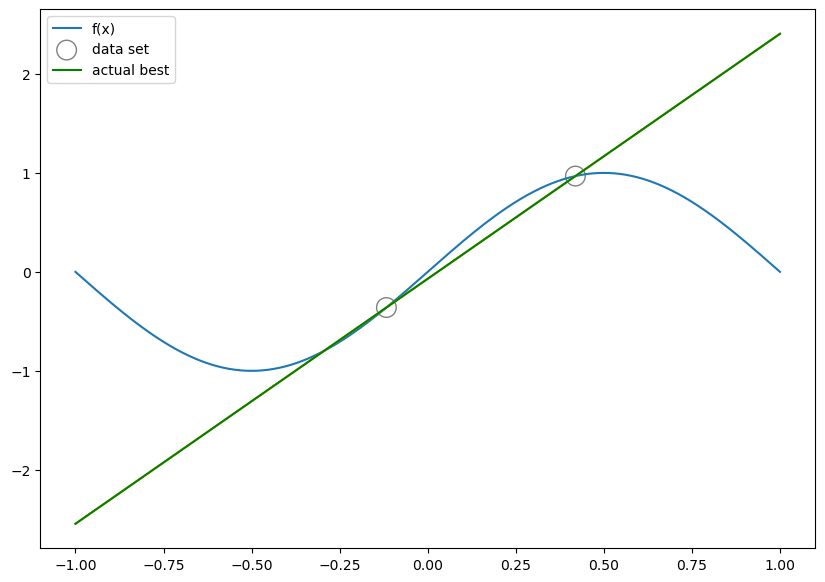

In [56]:
# Plot
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)
plt.plot(x,y, label='f(x)')

# Add two sample points
plt.scatter(sample_df['x'],sample_df['y'], marker='o',
            edgecolor= 'gray', facecolor= 'none', s= 200, label='data set')

# Add the line pass these two points

# Find the slope and intercept of the line passing through the two points
m = (sample_df['y'][1] - sample_df['y'][0]) / (sample_df['x'][1] - sample_df['x'][0])
b = sample_df['y'][0] - m * sample_df['x'][0]

y_line = m * x + b
plt.plot(x, y_line, color='orange')

# Add the line by using numpy polyfit
plt.plot(x, np.poly1d(np.polyfit(sample_df['x'], sample_df['y'],1))(x),
         color='green', label='actual best')



plt.legend()

plt.show

As above, lets compare this `numpy`s calculation:

As before, they should be overlapping!

## 3.C

Before we continue with the actual analysis of *learning* with these hypothesis classes, lets just see which one a priori does a better job **approximating** $f$.

Using `numpy`'s `polyfit` as we did above, find the best constant and line that fits *the entire function $f$ over $[-1,1]$. 

Lets begin with $\mathcal{H}_0$:

In [45]:
np.poly1d(np.polyfit(x,y,0))

poly1d([1.79078064e-17])

In [44]:
np.polyfit(x,y,0)

array([1.79078064e-17])

<function matplotlib.pyplot.show(close=None, block=None)>

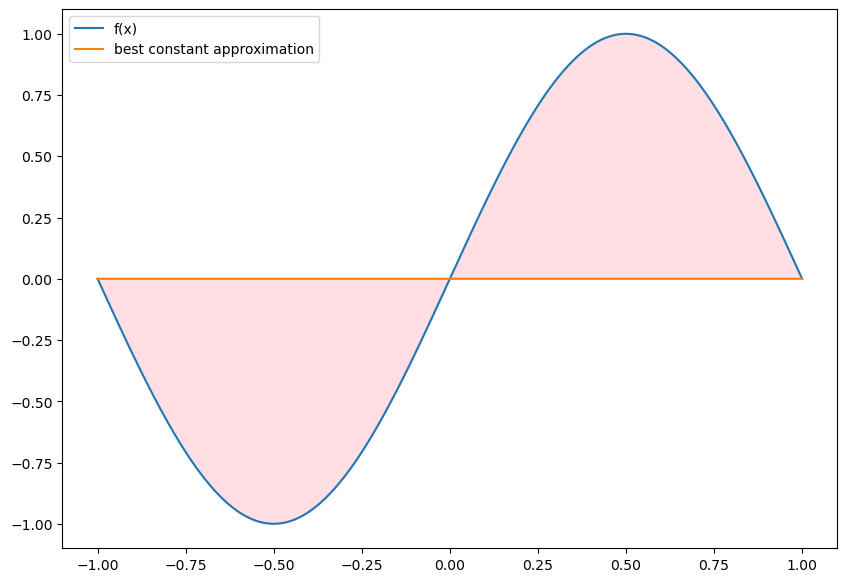

In [54]:
plt.plot(x,y, label='f(x)')

best_constant = np.poly1d(np.polyfit(x,y,0))(x)
plt.plot(x,best_constant, label='best constant approximation')

# Fill area between the lines
plt.fill_between(x, y, best_constant, color='pink', alpha=0.5)

plt.legend()
plt.show

Calculate the average total approximation error:

$$
E_{approx}(x) = (bestApproxContant(x) - f(x))^2\\
E_{approx} = \mathbb{E}_x [E_{approx}(x)]
$$

In [55]:
print('The average approximation error is: ', np.mean((best_constant-y)**2))

The average approximation error is:  0.49999950000000004


Now for the best linear approximation:

<function matplotlib.pyplot.show(close=None, block=None)>

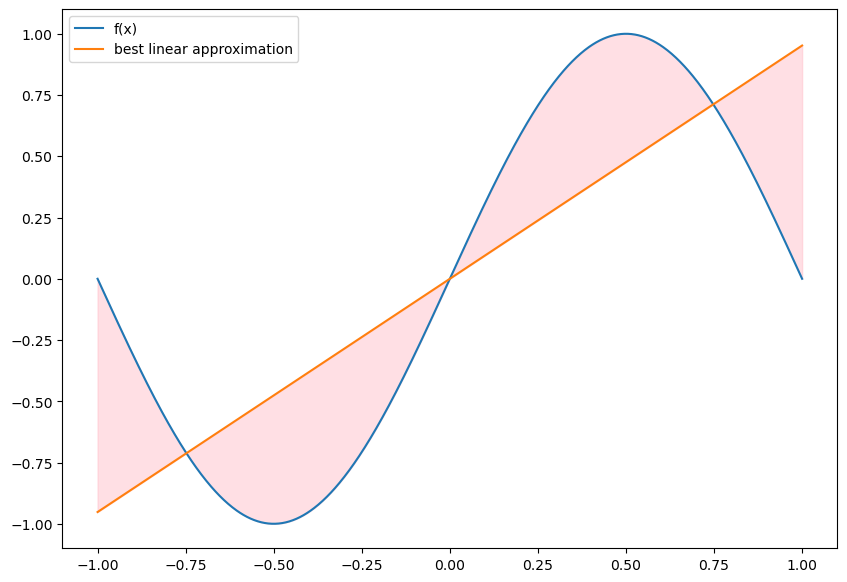

In [57]:
plt.plot(x,y, label='f(x)')

best_linear = np.poly1d(np.polyfit(x,y,1))(x)
plt.plot(x,best_linear, label='best linear approximation')

# Fill area between the lines
plt.fill_between(x, y, best_linear, color='pink', alpha=0.5)

plt.legend()
plt.show

As above, calculate the average approximation error

In [58]:
print('The average approximation error is: ', np.mean((best_linear-y)**2))

The average approximation error is:  0.1967521739631394


What do you conclude? 

**Answer:** With more flexibility, the linear model is a better fitting to the sin function than a constant fitting.

## 3.C

Now we get to the good stuff! We're going to repeat this process with **many data sets** so that we can estimate the **bias** and the **variance** induced by each Hypothesis class.

Lets begin by writing code to let us:

* generate many random datasets of size $N=2$
* uses `numpy` to calculate the best **constant** *and* **linear** hypotheses using **each** dataset
* plot each guess, and the **average** guess belonging to each hypothesis class.

Phew! Lets take it one step at a time. Lets first set the number of experiments we want to run to $100$.

In [59]:
numExperiments = 100

Now lets actually run the experiments

In [92]:
x = np.linspace(-1, 1, 1000)
y = np.sin(np.pi*x)

# Create two DataFrame for storing the corresponding data points for plotting
bestConstants = pd.DataFrame({})
bestLines = pd.DataFrame({})

for i in range(numExperiments):
    x_random = np.random.uniform(-1,1,2)
    y_random = np.sin(np.pi*x_random)
    sample_df = pd.DataFrame({
        'x': x_random,
        'y': y_random
    })
    
    
    best_constant = np.poly1d(np.polyfit(sample_df['x'],sample_df['y'],0))(x)
    bestConstants = bestConstants.append(pd.DataFrame(best_constant.reshape(1,1000)))
    
    best_line = np.poly1d(np.polyfit(sample_df['x'],sample_df['y'],1))(x)
    bestLines = bestLines.append(pd.DataFrame(best_line.reshape(1,1000)))

/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_51705/2453592417.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestConstants = bestConstants.append(pd.DataFrame(best_constant.reshape(1,1000)))
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_51705/2453592417.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestLines = bestLines.append(pd.DataFrame(best_line.reshape(1,1000)))
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_51705/2453592417.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestConstants = bestConstants.append(pd.DataFrame(best_constant.reshape(1,1000)))
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_51705/2453592417.py:18: FutureWarning: The frame.appe

Lets make sure we now have two arrays/matrices:

* one which stores the bestConstants we calcualte for each dataset
* one which stores the bestLine we calcualte for each dataset

Each should be of size: `numExperiments,lengthOfX`:

Lets now plot the results of our experiments. Lets first focus on $\mathcal{H_0}$ and take a look at each experiment, and the **mean** best experiment:

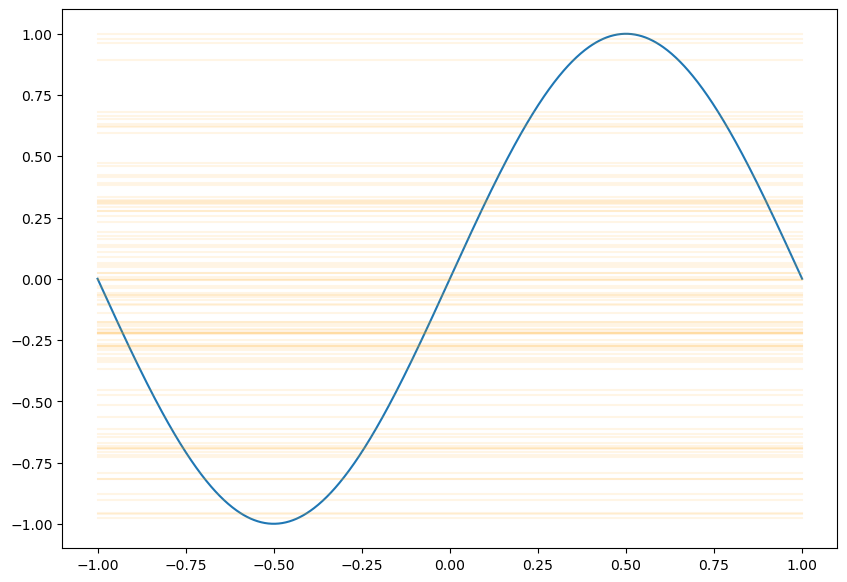

In [97]:
plt.plot(x,y)

for i in range(numExperiments):
    plt.plot(x, bestConstants.iloc[i], color='orange', alpha=0.1)
    
plt.show()

Lets **pause and ponder** here for a second. Each one of those orange lines is a different constant hypothesis, calcualted on each dataset of size $N=2$. What do you notice?

**Answer:** The majority of the lines are concentrated in the area adjacent to 0

Lets now look at the **mean** and **variance** of these different hypotheses:

In [110]:
# Calculate the mean and variance for best_constants and best_lines
mean_bestConstants = bestConstants.mean(axis=0)
var_bestConstants = bestConstants.var(axis=0)

mean_bestLines = bestLines.mean(axis=0)
var_bestLines = bestLines.var(axis=0)

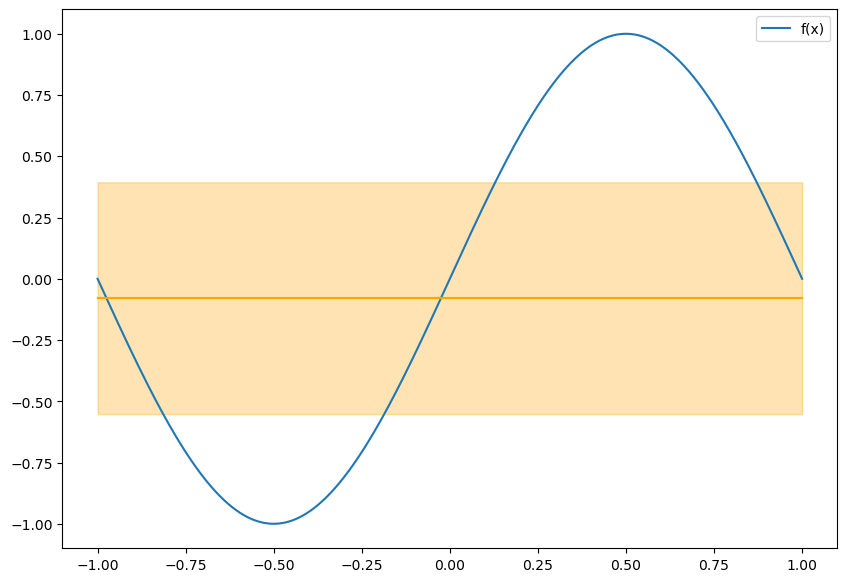

In [111]:
# Plot mean and variance for best_constants
plt.plot(x,y, label='f(x)')

plt.plot(x, mean_bestConstants, color='orange')
plt.fill_between(x, 
                 mean_bestConstants - np.sqrt(var_bestConstants),
                 mean_bestConstants + np.sqrt(var_bestConstants), 
                 color='orange',
                 alpha=0.3)

plt.legend()

The banding is the variance, and the dark line is the mean hypothesis. 

Lets now compare this to $\mathcal{H}_1$:

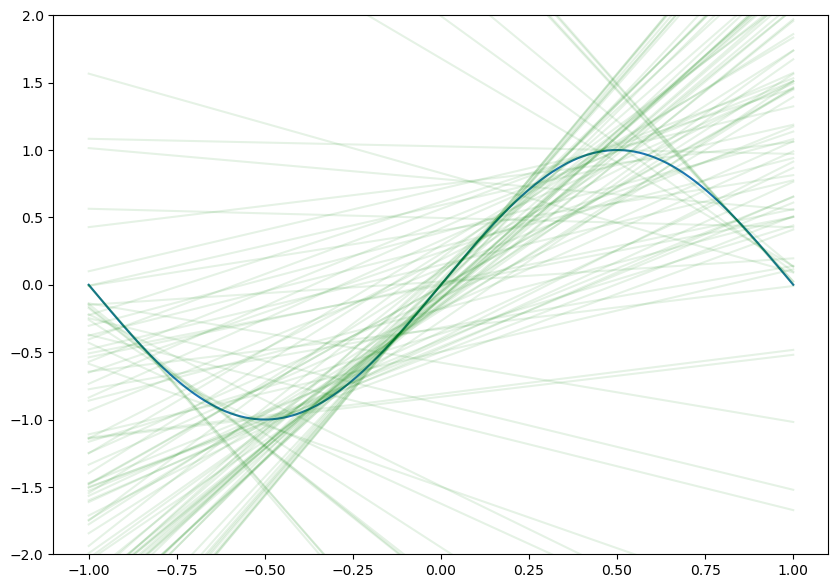

In [115]:
plt.plot(x,y)

for i in range(numExperiments):
    plt.plot(x, bestLines.iloc[i], color='green', alpha=0.1)

plt.ylim(-2,2)
plt.show()

What do you notice?

**Answer:** Compared to horizontal lines, these lines are much more disorganized and messy.

As above, lets now look at the **mean** and **variance** of these different hypotheses:

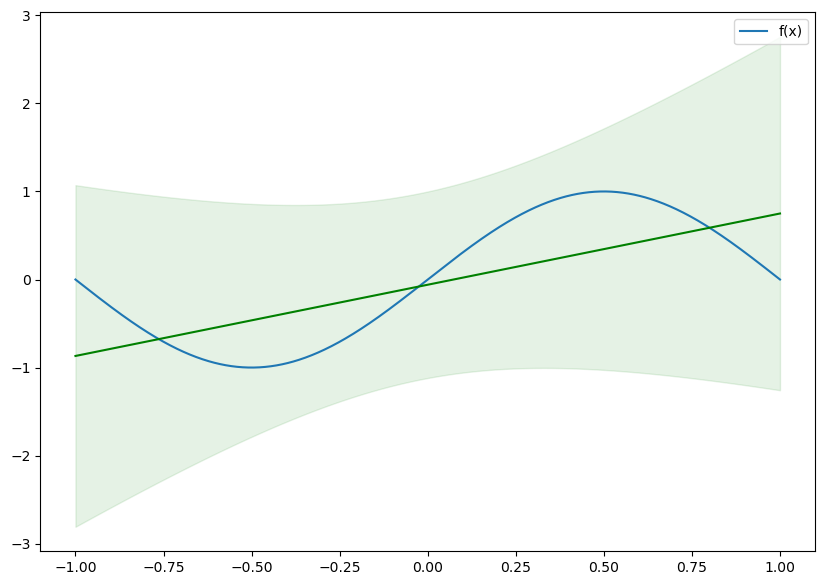

In [113]:
# Plot mean and variance for best_constants
plt.plot(x,y, label='f(x)')

plt.plot(x, mean_bestLines, color='green')
plt.fill_between(x, 
                 mean_bestLines - np.sqrt(var_bestLines),
                 mean_bestLines + np.sqrt(var_bestLines), 
                 color='green',
                 alpha=0.1)

plt.legend()
plt.show()

What do you notice?

**Answer:** Compared to horizontal lines, these lines' variance are much larger, the variance covers the entire sin curve.

## 3.D

Now, lets use the formula's we discussed to actually investigate and calcualte the **bias** and **variance** of these hypothesis classes. Lets begin the the **bias** of $\mathcal{H}_0$:

$$bias(x) = (\bar{g}(x) - f(x))^2$$.

Well $\bar{g}(x)$ is just the **average** hypothesis. This is easy to calcualte, we just take the `mean` over all the different hypothesis the different experiments/datasets generated (paying special attention to `np.mean`s `axis` keyword):

In [116]:
np.mean?

In [117]:
gBarH0 = bestConstants.mean(axis=0)

Now lets plot it, along with our original $f$:

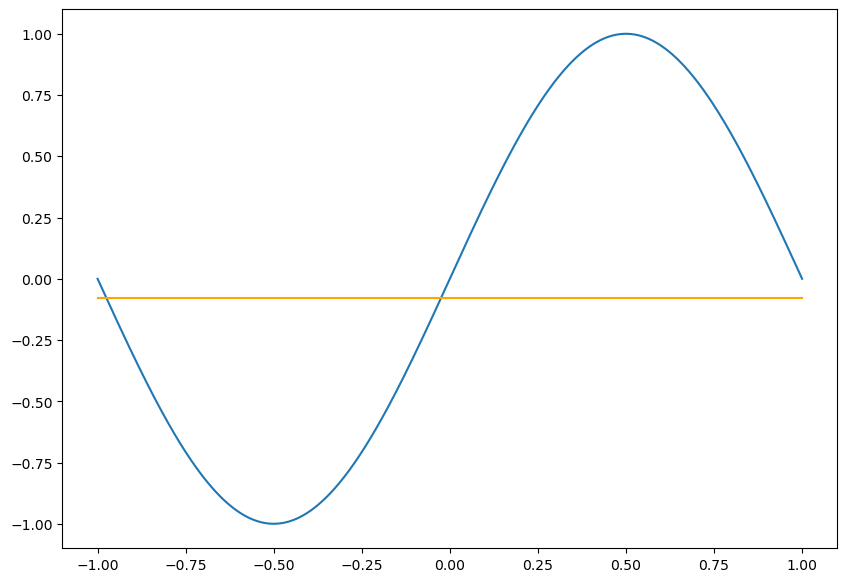

In [118]:
plt.plot(x,y, label='f(x)')

plt.plot(x, gBarH0, color='orange')

plt.show()

The **bias** is the **distance** between this average, our true function (squared):

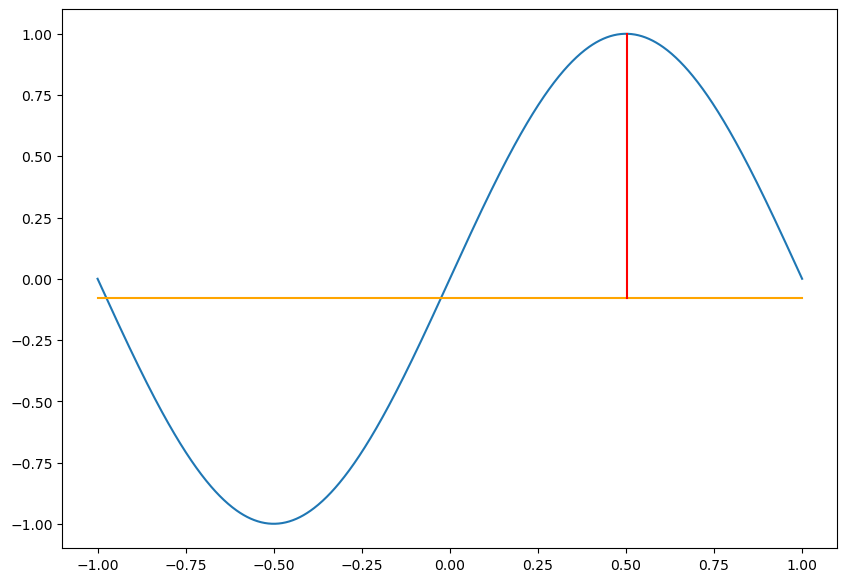

In [119]:
plt.plot(x,y, label='f(x)')

plt.plot(x, gBarH0, color='orange')

plt.plot([x[750],x[750]], [y[750], gBarH0[750]], color='red')

plt.show()

We can calculate this over the entire $x$ range as:

We can now just **average** over all of $x$ to define the **bias**:

$$bias = \mathbb{E}_{x}[bias(x)] = \mathbb{E}_{x}[(\bar{g}(x) - f(x))^2]$$

We can calculate this as:

In [153]:
bias_x = (gBarH0-y)**2
bias = np.mean(bias_x)
print('The bias of H0 is: ', bias)

The bias of H0 is:  0.5057854368948482


We can also calculate the variance:

$$
var(x) = \mathbb{E}_\mathcal{D}[g^\mathcal{D}(x)^2]-\bar{g}(x)^2\\
var = \mathbb{E}_x[var(x)]
$$

In [154]:
var_x = np.mean(bestConstants**2, axis=0) - gBarH0**2
var = np.mean(var_x)
print('The variance of H0 is: ', var)

The variance of H0 is:  0.22172215448575183


And so the total $E_{out}$ for this hypothesis class is:

In [155]:
print('The total E_out of H0 is: ', bias + var)

The total E_out of H0 is:  0.7275075913806001


## 3.E 

Repeat the above analysis with $\mathcal{H}_1$:

In [134]:
gBarH1 = bestLines.mean(axis=0)

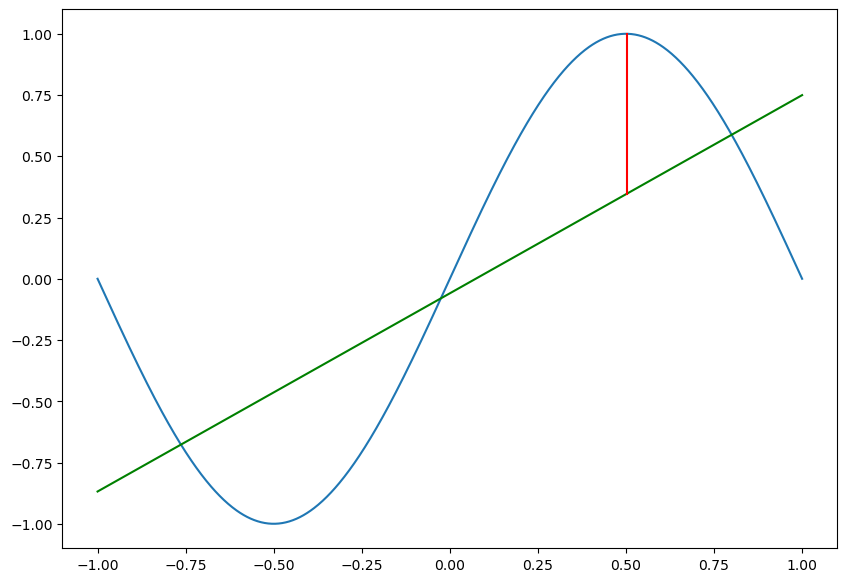

In [136]:
plt.plot(x,y, label='f(x)')

plt.plot(x, gBarH1, color='green')

plt.plot([x[750],x[750]], [y[750], gBarH1[750]], color='red')

plt.show()

In [156]:
bias_x = (gBarH1-y)**2
bias = np.mean(bias_x)
var_x = np.mean(bestLines**2, axis=0) - gBarH1**2
var = np.mean(var_x)

In [157]:
print('The bias of H1 is: ', bias)
print('The variance of H1 is: ', var)
print('The total E_out of H1 is: ', bias + var)

The bias of H1 is:  0.2071120980982182
The variance of H1 is:  2.0280040177374503
The total E_out of H1 is:  2.2351161158356687


## 3.F

Reflect on what you've observed above. Experiment, test ideas out, and explore. Write some of your questions, comments, observations below:

**Answer:** The H1 hypothesis space produces a smaller bias compared to H0 space. However, it causes a large rise of variance which finally makes the total $E_{out}$ even larger than H0.

# Problem 4

Now we are going to investigate how our analysis and results above **change with the size of the data**. 

For this part, turn your work above for problem 3 into a **function** of $N$. This function should report **and plot** the 

$$E_{out} = bias + var$$ 

as a **function** of datasets of size $N=2,3,4,5,6$ for **each** hypothesis class.

After doing this, we will make some observations and conclusions in 4.B below. 

**NOTE**: The depth and quality of your **investigation** as well as your **conclusions** is the important part here. 

## 4.A

Write your function in the cells below and report results for each hypothesis class

### H0

**EDIT THIS CELL AND THOSE ABOVE/BELOW WITH YOUR ANSWER. FEEL FREE TO MAKE MORE AS NEEDED.**

## 4.B

As stated above, make some observations and conclusions on your results for problem 3 and problem 4.A. 

**NOTE**: The depth and quality of your **investigation** as well as your **conclusions** is the important part here. 

**EDIT THIS CELL AND THOSE ABOVE/BELOW WITH YOUR ANSWER. FEEL FREE TO MAKE MORE AS NEEDED.**

## Tips

In the problem above, it might be useful to make use of `matplotlib`'s `subplots` function:

In [38]:
plt.subplots?

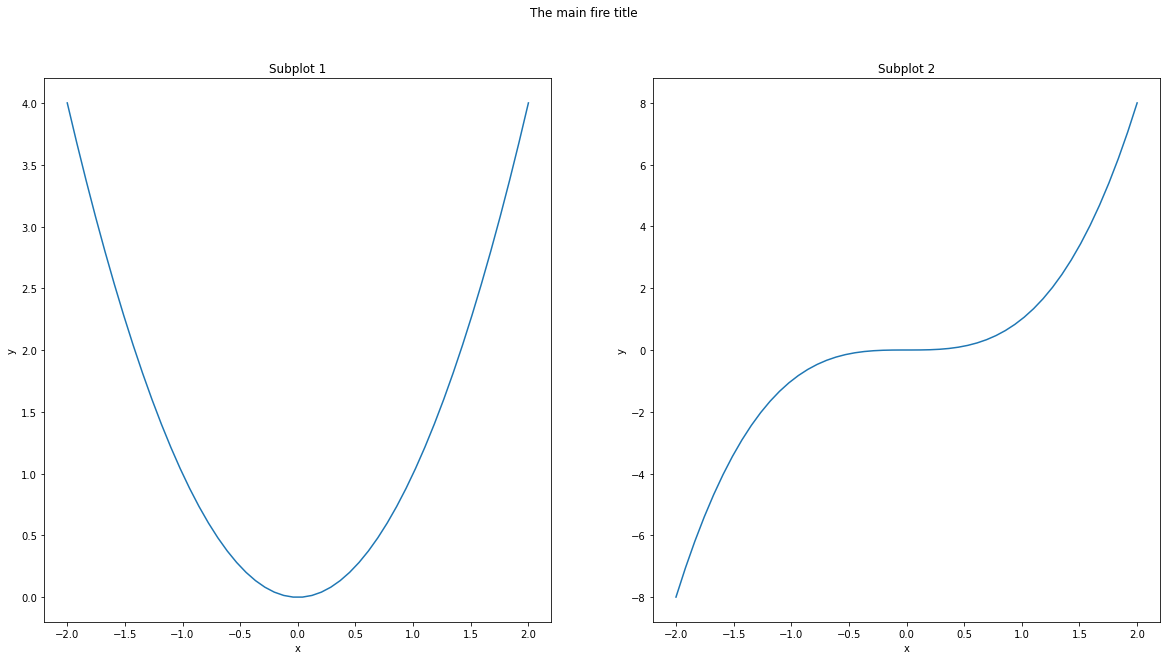

In [39]:
x = np.linspace(-2,2)

# setup figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,10))
fig.suptitle('The main fire title')

# plot on the first subplot
ax1.plot(x, x**2);
ax1.set_ylabel('y');
ax1.set_xlabel('x');
ax1.set_title('Subplot 1');

# plot on the second
ax2.plot(x, x**3);
ax2.set_ylabel('y');
ax2.set_xlabel('x');
ax2.set_title('Subplot 2');